[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



categorical - hair color;
quantitative - number of meatballs;
discrete - pairs of shoes;
continuous - weight;

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


In [2]:
carbon_west.head()
carbon_west.tail()

,Nation,CO2
30,Spain,5.0
31,Sweden,4.5
32,Switzerland,4.3
33,UK,6.5
34,US,16.5


Part a. Construct a histogram of CO2 emissions.

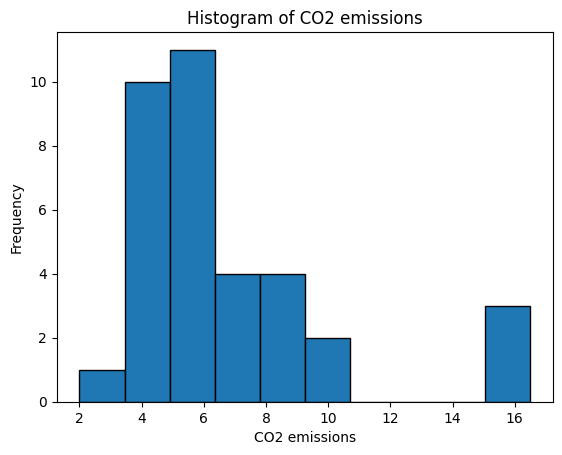

In [3]:
plt.hist(carbon_west['CO2'],  edgecolor='black')
plt.xlabel('CO2 emissions')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 emissions')
plt.show()


Part b. Find the mean, median, and standard deviation.

In [5]:
mean_value = np.mean(carbon_west["CO2"])
median_value = np.median(carbon_west["CO2"])
std_deviation = np.std(carbon_west["CO2"])

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [8]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murders.head()

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6


Part a. Find the mean and standard deviation for murders without D.C.

In [9]:
murders_DC = murders[murders['state'] != 'DC']

mean_value = np.mean(murders_DC["murder"])
std_deviation = np.std(murders_DC["murder"])

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 4.874
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [10]:
five_number_summary = murders_DC['murder'].describe()
print(five_number_summary)

count    50.000000
mean      4.874000
std       2.586291
min       1.000000
25%       2.625000
50%       4.850000
75%       6.175000
max      12.400000
Name: murder, dtype: float64


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [11]:
mean_value = np.mean(murders["murder"])
median_value = np.median(murders["murder"])
five_number_summary = murders['murder'].describe()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Five-number summary:\n{five_number_summary}")

Mean: 5.252941176470588
Median: 5.0
Five-number summary:
count    51.000000
mean      5.252941
std       3.725391
min       1.000000
25%       2.650000
50%       5.000000
75%       6.450000
max      24.200000
Name: murder, dtype: float64


I looks like the mean was more affected than the median. This makes sense because DC is such a big outlier which would affect mean more. The range was more affected than the IQR which also makes sense because we basically just added a large outlier that was by far the biggest number.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [12]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

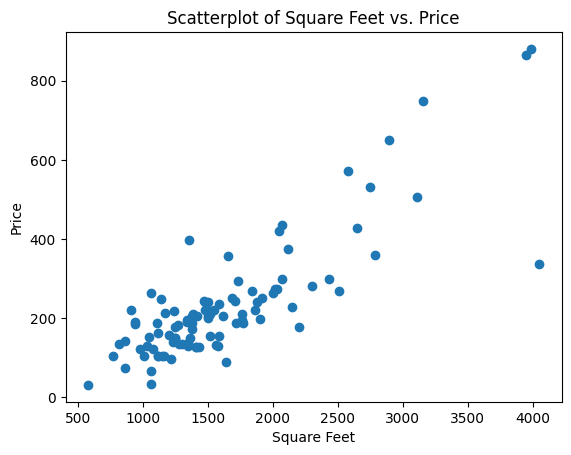

In [13]:
x = houses['size']
y = houses['price']

plt.scatter(x, y)
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Scatterplot of Square Feet vs. Price')
plt.show()

Part b. Find the correlation between the two variables.

In [14]:
correlation = houses['size'].corr(houses['price'])
print(f"Correlation: {correlation}")

Correlation: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

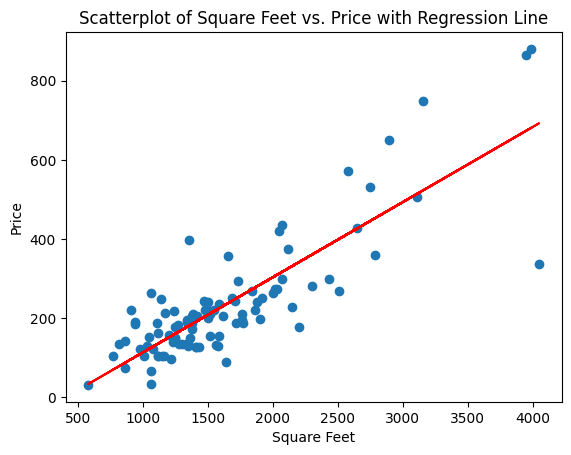

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(houses[['size']], houses['price'])

plt.scatter(houses['size'], houses['price'])
plt.plot(houses['size'], model.predict(houses[['size']]), color='red')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Scatterplot of Square Feet vs. Price with Regression Line')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

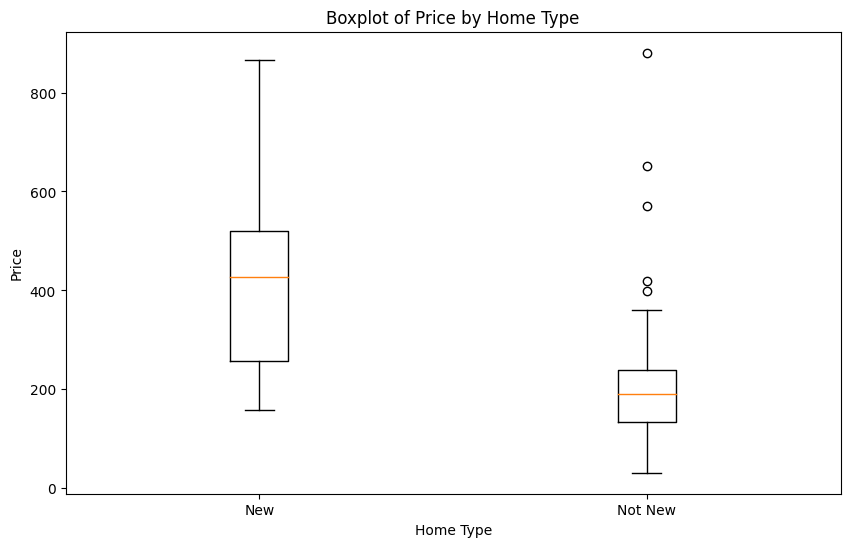

In [19]:
plt.figure(figsize=(10, 6))
plt.boxplot([houses[houses['new'] == 1]['price'], houses[houses['new'] == 0]['price']], labels=['New', 'Not New'])
plt.xlabel('Home Type')
plt.ylabel('Price')
plt.title('Boxplot of Price by Home Type')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

Size and price are positivily correlated as they have a correlation of .83. This means that as the size of a house increases, the price usually increases as well. Also, according to the boxplot, the median is much higher for new houses rather than for not new houses. This shows that new houses are typically worth more than not new houses.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [7]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep="\\s+")

In [8]:
happy.head()

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male


In [9]:
crosstab = pd.crosstab(happy['marital'], happy['happiness'], normalize = 'index')
print(crosstab)

happiness         1         2         3
marital                                
1          0.433300  0.505517  0.061184
2          0.192872  0.591195  0.215933
3          0.185629  0.612275  0.202096
